# Décomposition en valeurs singulières

On se propose ici de visualiser un résultat d'approximation d'une matrice par des matrices de rang petit. Le principe est simple : une image en niveaux de gris peut être codée par une matrice d'entiers compris entre 0 et 255. Ici, elle sera codée par des nombres réels compris entre 0 et 1.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy.random as rd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

def view_image(ax, img):
    ax.imshow(img, cmap = 'gray')
    ax.set_axis_off()

Nous commençons par importer une image de chat (ou de chatons) en niveau de gris. Nous créons également une image aléatoire de la même taille.

In [1]:
# image de chatons
Chat_png = mpimg.imread('Chatons.png') # parce que tout le monde aime les chats ?
Chat = Chat_png[:,:,:] # extraction d'une couleur
# image aléatoire
Alea = rd.randint(0, 255, size = Chat.shape)

NameError: name 'mpimg' is not defined

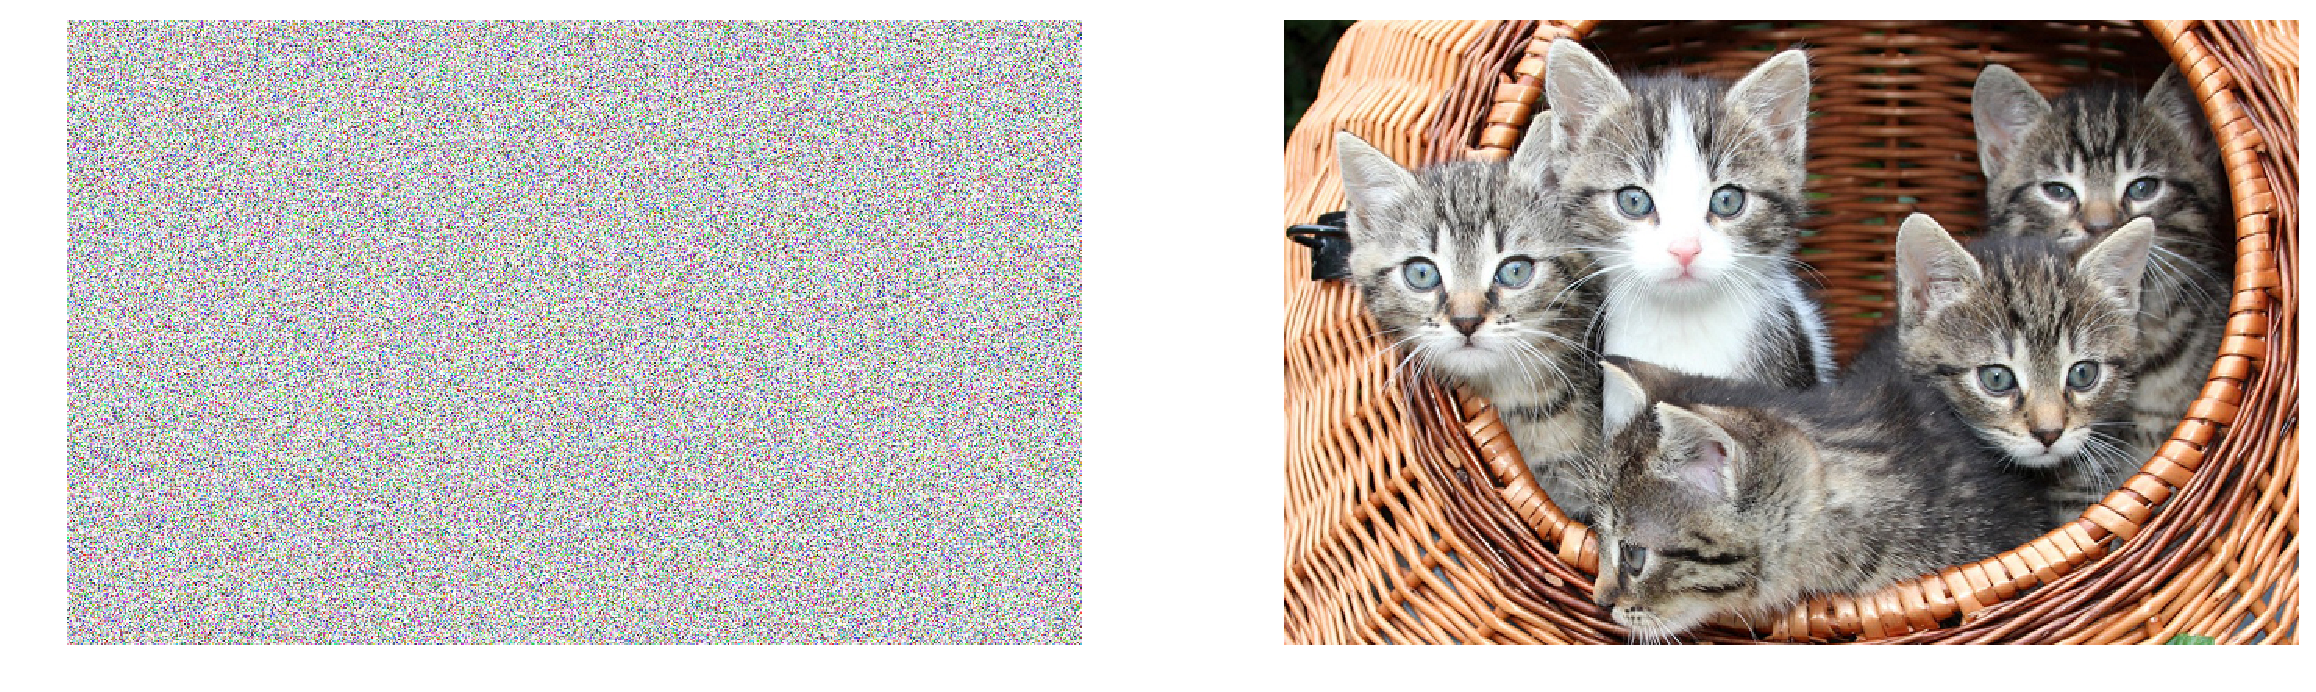

In [56]:
Fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 10))
view_image(ax1, Alea)
view_image(ax2, Chat)
plt.show()

### Approximation de rang inférieur



Soit $A\in\mathcal{M}_{n,p}(\mathbb{R})$ une matrice de rang $r \geq 1$. 
Pour tout entier $0\leq k \leq \min(n,p)$, définissons 

$$
\mathcal{E}(k) = \min_{\text{rg} B \,\leq\, k} \big|\big|\big| A - B\, \big|\big|\big|_2
\,.
$$


Une décomposition en valeurs singulières $A = U\Sigma V^T$ étant donnée, 
on désigne par 

$$
\sigma_1 \geq \cdots \geq \sigma_r > 0
$$

les coefficients diagonaux non nuls de $\Sigma = (\sigma_i \delta_{i,j})$. 

Dans l'exercice 2 de la feuille de TD no. 5, on démontre que pour tout entier $0\leq k \leq \min(n,p)$, 

$$
\mathcal{E}(k) = \sigma_{k+1}\,.
$$

### Question

> Tracer $\mathcal{E}(k)$ en fonction de $k$ pour les deux matrices ci-dessus et comparer l'allure des deux graphes, en particulier au-delà des toutes premières valeurs. On utilisera `np.linalg.svd` pour calculer les décompositions en valeurs singulières.

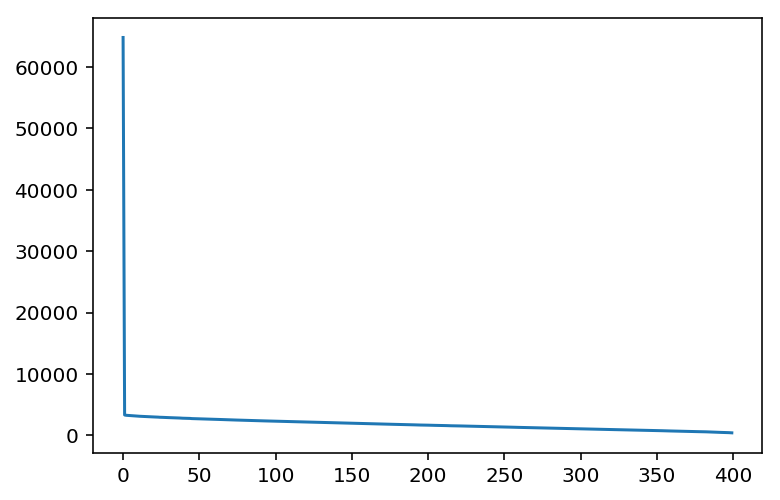

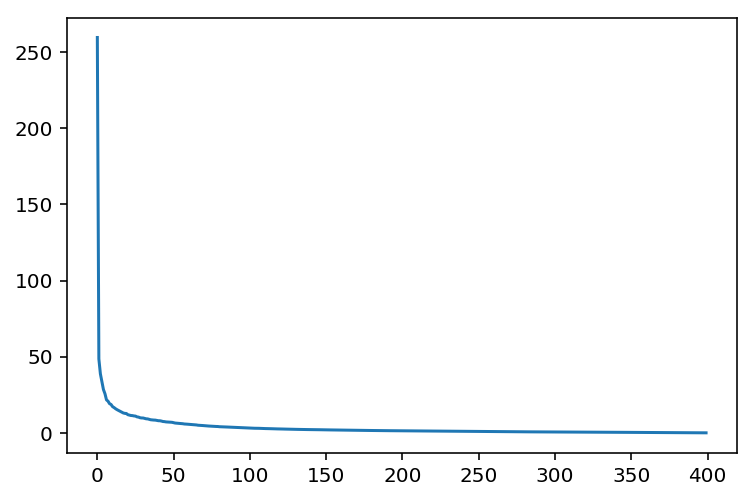

In [39]:
U1,E1,V1 = np.linalg.svd(Alea)
U2,E2,V2 = np.linalg.svd(Chat)

eps1=[]
eps2=[]

eps1.append(E1[:])
eps2.append(E2[:])

k = np.arange(0,400)
#print(k)
plt.figure(0)
plt.plot(k,eps1[0])
plt.figure(1)
plt.plot(k,eps2[0])







## Meilleure approximation de rang donné

Pour tout entier $0\leq k \leq \min(n,p)$, si l'on note $B_k = U \Sigma_k V^T$ avec $\Sigma_k$ la matrice tronquée 

$$
\Sigma_k = (\sigma_i \mathbf{1}_{i\leq k} \delta_{i,j})
\,,
$$

alors on montre que $B_k$ est la meilleure approximation de $A$, parmi les matrices de rang $\leq k$, au sens où

$$
\mathcal{E}(k)
= \big|\big|\big| A - B_k \big|\big|\big|_2
\,.
$$

### application à la compression

#### Question
> Visualiser, pour diverses valeurs de $k$, la matrice $B_k$ comme une image et comparer avec l'original $A$. Quel est le "taux de compression" correspondant ?

In [49]:
U,E,Vt = np.linalg.svd(Chat)
V = Vt.T 
k=[]